# Определение перспективного тарифа для телеком-компании

## Изучение общей информации:

In [119]:
import pandas as pd
import numpy as np
import matplotlib as mplt

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')



### Исследуем calls.csv:

In [120]:
print('______________info_____________________')
print(calls.info())
print('______________describe_________________')
print(users.describe())
print('______________head_____________________')
print(calls.head(10))
print('______________sample___________________')
print(calls.sample(5))
print('_____________isnull____________________')
print(calls.isnull().sum())
print('_____________duplicated________________')
print(users.duplicated().sum())


______________info_____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
______________describe_________________
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000
______________head_____________________
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21  

In [121]:
# звонки, продолжительностью более 0 минут
calls.query('duration != 0').count()

id           162994
call_date    162994
duration     162994
user_id      162994
dtype: int64

### Исследуем internet.csv

In [122]:
print('______________info_____________________')
print(internet.info())
print('______________describe_________________')
print(internet.describe())
print('______________head_____________________')
print(internet.head(10))
print('______________sample___________________')
print(internet.sample(5))
print('_____________isnull____________________')
print(internet.isnull().sum())
print('_____________duplicated________________')
print(internet.duplicated().sum())


______________info_____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
______________describe_________________
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     144.050823
min         0.000000       0.000000    1000.000000
25%     37348.750000     138.187500    1130.000000
50%     74697.500000     348.015000    1251.000000
75%    112046.250000     559.552500    1380.000000
max    149395.000000    172

In [123]:
# соединения без трафика
internet[internet['mb_used'] == 0].count()

Unnamed: 0      19598
id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

### Исследуем messages:

In [124]:
print('______________info_____________________')
print(messages.info())
print('______________describe_________________')
print(messages.describe())
print('______________head_____________________')
print(messages.head(10))
print('______________sample___________________')
print(messages.sample(5))
print('_____________isnull____________________')
print(messages.isnull().sum())
print('_____________duplicated________________')
print(messages.duplicated().sum())


______________info_____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
______________describe_________________
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000
______________head_____________________
       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000
5  1000_5   2018-06-20     1000
6  1000_6   2018-11-19     1000
7  1000_7   2018-10-29     1000
8  1000_8   2018-06-25 

### Исследуем tariffs:

In [125]:
print('______________info_____________________')
print(tariffs.info())
print('______________describe_________________')
print(tariffs.describe())
print('______________head_____________________')
print(tariffs.head(10))
print('______________sample___________________')
print(tariffs.sample(2))
print('_____________isnull____________________')
print(tariffs.isnull().sum())
print('_____________duplicated________________')
print(tariffs.duplicated().sum())
print('___________value_counts________________')
print(users['tariff'].value_counts())


______________info_____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
______________describe_________________
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.16

### Исследуем users:

In [126]:
print('______________info_____________________')
print(users.info())
print('______________describe_________________')
print(users.describe())
print('______________head_____________________')
print(users.head(10))
print('______________sample___________________')
print(users.sample(5))
print('_____________isnull____________________')
print(users.isnull().sum())
print('_____________duplicated________________')
print(users.duplicated().sum())


______________info_____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
______________describe_________________
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000
______________head_____________________
   user_id  age churn_date              city first

### Вывод:

- в данных содержится информация о 500 абонентах.
- 351 абонент пользуется тарифом «Смарт»
- 149 абонентов пользуются тарифом «Ультра»
- 462 NaN значения содержит колонка churn_date (дата прекращения пользования тарифом)
- необходимо привести к формату DateTime: call_date, session_date, message_date, churn_date, reg_date
- в calls есть звонки с 0 продолжительностью (это пропущенные вызовы)
- в internet необходимо округлить мегабайты до гигабайт
- в internet колонка `Unnamed: 0` дублирует индекс строк
- в calls необходимо округлить звонки до минут
- дубликатов нет во всех данных




## Подготовка данных

Приведем к формату DateTime: call_date, session_date, message_date, churn_date, reg_date

In [127]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')

In [128]:
users['reg_date'].head()

0   2018-05-25
1   2018-11-01
2   2018-06-17
3   2018-08-17
4   2018-05-14
Name: reg_date, dtype: datetime64[ns]

In [129]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S')

In [130]:
users['churn_date'].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: churn_date, dtype: datetime64[ns]

In [131]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')

In [132]:
calls['call_date'].head()

0   2018-07-25
1   2018-08-17
2   2018-06-11
3   2018-09-21
4   2018-12-15
Name: call_date, dtype: datetime64[ns]

In [133]:
calls['id'] = calls['id'].astype(int)

In [134]:
calls['month'] = calls['call_date'].dt.month

In [135]:
calls['month'].head()

0     7
1     8
2     6
3     9
4    12
Name: month, dtype: int64

In [136]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')

In [137]:
messages['message_date'].head()

0   2018-06-27
1   2018-10-08
2   2018-08-04
3   2018-06-16
4   2018-12-05
Name: message_date, dtype: datetime64[ns]

In [138]:
messages['id'] = messages['id'].astype(int)

In [139]:
messages['month'] = messages['message_date'].dt.month

In [140]:
messages['month'].head()

0     6
1    10
2     8
3     6
4    12
Name: month, dtype: int64

In [141]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

In [142]:
internet['session_date'].head()

0   2018-11-25
1   2018-09-07
2   2018-06-25
3   2018-08-22
4   2018-09-24
Name: session_date, dtype: datetime64[ns]

In [143]:
internet['month'] = internet['session_date'].dt.month

In [144]:
internet['month'].head()

0    11
1     9
2     6
3     8
4     9
Name: month, dtype: int64

Приведем продолжительность звонков к целочисленному типу:

In [145]:
calls['duration'] = calls['duration'].astype(int)

Приведем значения трафика к целочисленному виду:

In [146]:
internet['mb_used'] = internet['mb_used'].astype(int)

Удалим повторяющиеся данные из таблицы internet:

In [147]:
internet.drop(['Unnamed: 0'], axis='columns', inplace=True)

Округлим в большую сторону звонки, согласно условию:

In [148]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.sample(10).T

,168177,140612,59011,125151,30523,97949,110465,184430,30350,127417
id,1414297,1358374,1148474,1321601,107795,124924,128463,1457402,1076642,1326280
call_date,2018-06-29 00:00:00,2018-11-26 00:00:00,2018-10-11 00:00:00,2018-12-06 00:00:00,2018-10-27 00:00:00,2018-10-24 00:00:00,2018-11-22 00:00:00,2018-06-22 00:00:00,2018-09-17 00:00:00,2018-11-17 00:00:00
duration,15.0,0.0,0.0,13.0,14.0,17.0,3.0,7.0,18.0,18.0
user_id,1414,1358,1148,1321,1077,1249,1284,1457,1076,1326
month,6,11,10,12,10,10,11,6,9,11


Добавим в таблицу calls столбец с месяцем:

In [149]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.sample(10).T

,5704,98074,145072,187869,38266,126709,184896,112472,148094,143190
id,1015424,1249149,1365204,1464389,109630,132590,1458188,1289330,1375925,1363102
call_date,2018-07-28 00:00:00,2018-10-13 00:00:00,2018-11-13 00:00:00,2018-09-04 00:00:00,2018-05-11 00:00:00,2018-11-04 00:00:00,2018-09-28 00:00:00,2018-09-29 00:00:00,2018-07-31 00:00:00,2018-03-24 00:00:00
duration,5.0,9.0,20.0,0.0,11.0,0.0,3.0,12.0,0.0,4.0
user_id,1015,1249,1365,1464,1096,1325,1458,1289,1375,1363
month,7,10,11,9,5,11,9,9,7,3


Округлим трафик в большую сторону:

In [150]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype(int)
internet.sample(10).T

,123771,14266,145743,84774,8515,106652,51685,12759,16204,90122
id,1416_33,1050_93,1487_86,1288_87,1029_167,1361_89,1175_338,1044_396,1056_8,1305_9
mb_used,314,162,332,3,46,607,211,619,821,443
session_date,2018-10-10 00:00:00,2018-07-18 00:00:00,2018-09-15 00:00:00,2018-12-28 00:00:00,2018-09-30 00:00:00,2018-12-24 00:00:00,2018-04-25 00:00:00,2018-06-05 00:00:00,2018-09-01 00:00:00,2018-11-03 00:00:00
user_id,1416,1050,1487,1288,1029,1361,1175,1044,1056,1305
month,10,7,9,12,9,12,4,6,9,11


Добавим в табллицу internet колонку с траффиком в Гб, округлив до большего значения, согласно условию:

In [151]:
internet['gb_used'] = (internet['mb_used'] / 1024).apply(np.ceil).astype(int)
#internet['gb_used'] = internet['gb_used'].apply(np.ceil).astype(int)
internet['gb_used'].head(10).to_frame().T

,0,1,2,3,4,5,6,7,8,9
gb_used,1,2,2,1,1,1,1,1,1,1


Добавим в таблицу internrt столбец с месяцем:

In [152]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.sample(10).T

,67683,7237,144618,9962,58573,133063,148924,148186,57599,132209
id,1229_13,1025_129,1482_419,1033_342,1197_208,1443_174,1497_38,1496_134,1193_138,1439_326
mb_used,279,486,198,343,0,0,103,726,118,0
session_date,2018-12-17 00:00:00,2018-09-10 00:00:00,2018-06-24 00:00:00,2018-08-21 00:00:00,2018-09-05 00:00:00,2018-10-30 00:00:00,2018-11-12 00:00:00,2018-07-06 00:00:00,2018-08-31 00:00:00,2018-09-19 00:00:00
user_id,1229,1025,1482,1033,1197,1443,1497,1496,1193,1439
month,12,9,6,8,9,10,11,7,8,9
gb_used,1,1,1,1,0,0,1,1,1,0


Добавим в таблицу messages колонку с месяцем:

In [153]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.sample(10).T

,55420,9394,115066,50277,109345,111445,54464,52664,40802,50776
id,1244586,103950,1471294,1222481,1440286,145124,1243162,12311285,1174147,1226452
message_date,2018-07-10 00:00:00,2018-09-18 00:00:00,2018-09-16 00:00:00,2018-10-02 00:00:00,2018-06-22 00:00:00,2018-10-20 00:00:00,2018-12-27 00:00:00,2018-05-24 00:00:00,2018-11-07 00:00:00,2018-09-20 00:00:00
user_id,1244,1039,1471,1222,1440,1451,1243,1231,1174,1226
month,7,9,9,10,6,10,12,5,11,9


Добавим в таблицу users колонку с месяцем подключения:

In [154]:
users['reg_month'] = pd.DatetimeIndex(users['reg_date']).month
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
333,1333,58,NaT,Москва,Вера,Антонова,2018-09-28,ultra,9
59,1059,47,NaT,Курск,Глеб,Свиридов,2018-04-14,smart,4
226,1226,19,NaT,Новосибирск,Альбин,Бобылёв,2018-06-01,ultra,6
29,1029,51,NaT,Екатеринбург,Алексей,Селезнев,2018-09-15,smart,9
473,1473,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra,8


Добавим в таблицу users колонку с месяцем отключения:

In [155]:
users['churn_month'] = pd.DatetimeIndex(users['churn_date']).month
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
227,1227,66,NaT,Санкт-Петербург,Раиса,Калинина,2018-01-09,smart,1,NaN
479,1479,40,NaT,Хабаровск,Игорь,Богданов,2018-07-03,smart,7,NaN
372,1372,71,NaT,Магнитогорск,Лидия,Авраамова,2018-01-23,smart,1,NaN
140,1140,22,NaT,Киров,Леонид,Ахматулин,2018-12-31,smart,12,NaN
185,1185,26,NaT,Санкт-Петербург,Мануэла,Родина,2018-04-13,ultra,4,NaN


Изменим данные в tariffs, согласно условию:

In [156]:
tariffs['gb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024)
tariffs['gb_per_month_included'] = tariffs['gb_per_month_included'].apply(np.ceil).astype(int)
tariffs['gb_per_month_included'].head(15).to_frame().T

,0,1
gb_per_month_included,15,30


### Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя:

In [157]:
#users_calls_month = pd.pivot_table(calls, index=['user_id','month'], values=['duration','id'],
#                                   aggfunc={'duration':sum,'id':'count'}).reset_index()
#users_calls_month.columns = ['user_id', 'month', 'duration_month', 'count_calls']

##users_calls_month.rename(columns={'user_id':'id_пользователя','id':'количество_звонков',
##                                  'duration':'длительность_звонков', 'month':'месяц'}, inplace=True)

users_calls_month = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index()
users_calls_month.columns = ['user_id', 'month', 'duration_month', 'count_calls']


users_calls_month.head(10)

,user_id,month,duration_month,count_calls
0,1000,5,142.0,22
1,1000,6,144.0,43
2,1000,7,299.0,47
3,1000,8,367.0,52
4,1000,9,421.0,58
5,1000,10,306.0,57
6,1000,11,301.0,43
7,1000,12,295.0,46
8,1001,11,385.0,59
9,1001,12,367.0,63


### Посчитаем количество отправленных сообщений по месяцам для каждого пользователя:

In [158]:
#users_messages_month = pd.pivot_table(messages, index=['user_id','month'], values=['id'], aggfunc='count').reset_index()
##users_messages_month.rename(columns={'user_id':'id_пользователя', 'month':'месяц', 'id':'кол-во_сообщений'}, inplace=True)
#users_messages_month.columns = ['user_id', 'month',  'count_sms']

users_messages_month = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
users_messages_month.columns = ['user_id', 'month',  'count_sms']

users_messages_month.sample(10)

,user_id,month,count_sms
2601,1478,12,83
2395,1443,11,21
2009,1381,4,40
1114,1214,7,51
268,1051,8,3
405,1073,11,29
2562,1473,10,20
1425,1276,11,20
1444,1280,8,42
1605,1310,10,56


### Посчитаем объем израсходованного интернет-трафика по месяцам для каждого пользователя:

In [159]:
#users_internet_month = pd.pivot_table(internet, index=['user_id','month'], values=['gb_used'], aggfunc=sum).reset_index()
##users_internet_month.rename(columns={'user_id':'id_пользователя', 'month':'месяц', 'gb_used':'кол-во_gb'}, inplace=True)

users_internet_month = internet.groupby(['user_id', 'month']).agg({'gb_used':'sum'}).reset_index()

users_internet_month.sample(10)

,user_id,month,gb_used
3112,1482,12,36
293,1047,11,74
715,1113,3,38
1611,1254,3,52
2857,1448,10,42
554,1088,11,40
738,1116,5,33
2047,1324,10,83
2482,1390,12,57
3189,1496,10,72


### Посчитаем помесячную выручку с каждого пользователя:

Сгруппируем таблицу расходов за месяц (по звонкам, сообщениям и трафику):

In [160]:
#df_calls_messages = users_calls_month.merge(users_messages_month, how = 'outer')

df_month = users_calls_month.merge(users_messages_month, on=['user_id','month'], how='outer')

In [161]:
#df_month = df_calls_messages.merge(users_internet_month, on=['user_id','month'], how = 'outer')

df_month = df_month.merge(users_internet_month, on=['user_id','month'], how = 'outer')


df_month.head(10)

,user_id,month,duration_month,count_calls,count_sms,gb_used
0,1000,5,142.0,22.0,22.0,4.0
1,1000,6,144.0,43.0,60.0,49.0
2,1000,7,299.0,47.0,75.0,28.0
3,1000,8,367.0,52.0,81.0,27.0
4,1000,9,421.0,58.0,57.0,26.0
5,1000,10,306.0,57.0,73.0,28.0
6,1000,11,301.0,43.0,58.0,27.0
7,1000,12,295.0,46.0,70.0,19.0
8,1001,11,385.0,59.0,NaN,47.0
9,1001,12,367.0,63.0,NaN,35.0


In [162]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   duration_month  3174 non-null   float64
 3   count_calls     3174 non-null   float64
 4   count_sms       2717 non-null   float64
 5   gb_used         3203 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


Проверим таблицу на наличие пропусков:

In [163]:
df_month.isna().sum()

user_id             0
month               0
duration_month     40
count_calls        40
count_sms         497
gb_used            11
dtype: int64

In [164]:
#df_month[df_month['count_calls'].isna()==True]

Заменим пропуски нулями, т.к. возможно эти абоненты не пользовались указанными типами связи.

In [165]:
df_month['duration_month'] = df_month['duration_month'].fillna(0).astype(int)
df_month['count_calls'] = df_month['count_calls'].fillna(0).astype(int)
df_month['count_sms'] = df_month['count_sms'].fillna(0).astype(int)
df_month['gb_used'] = df_month['gb_used'].fillna(0).astype(int)

Сгруппируем таблицу расходов за месяц с остальными данными:

In [166]:
#df_month_all = df_month.merge(users_internet_month, on=['user_id','month'], how='outer')
#df_month_all = df_month_all.merge(users, on='user_id', how='outer')

df_month = df_month.merge(users, on='user_id', how='left')

df_month.head(10)

,user_id,month,duration_month,count_calls,count_sms,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,1000,5,142,22,22,4,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
1,1000,6,144,43,60,49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
2,1000,7,299,47,75,28,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
3,1000,8,367,52,81,27,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
4,1000,9,421,58,57,26,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
5,1000,10,306,57,73,28,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
6,1000,11,301,43,58,27,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
7,1000,12,295,46,70,19,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
8,1001,11,385,59,0,47,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,NaN
9,1001,12,367,63,0,35,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,NaN


In [167]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


In [168]:
# переименуем, для мёрджа)
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [169]:
#df_month_all = df_month_all.join(tariffs, how='outer')

df_all = df_month.merge(tariffs, on='tariff', how='left')

In [170]:
df_all.tail()

,user_id,month,duration_month,count_calls,count_sms,gb_used,age,churn_date,city,first_name,...,reg_month,churn_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
3209,1489,9,0,0,32,50,35,NaT,Санкт-Петербург,Павел,...,8,NaN,50,15360,500,550,200,3,3,15
3210,1489,10,0,0,21,52,35,NaT,Санкт-Петербург,Павел,...,8,NaN,50,15360,500,550,200,3,3,15
3211,1489,11,0,0,20,46,35,NaT,Санкт-Петербург,Павел,...,8,NaN,50,15360,500,550,200,3,3,15
3212,1489,12,0,0,35,45,35,NaT,Санкт-Петербург,Павел,...,8,NaN,50,15360,500,550,200,3,3,15
3213,1476,4,0,0,0,1,50,NaT,Москва,Валентина,...,4,NaN,1000,30720,3000,1950,150,1,1,30


In [171]:
df_all.head()

,user_id,month,duration_month,count_calls,count_sms,gb_used,age,churn_date,city,first_name,...,reg_month,churn_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,142,22,22,4,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,30
1,1000,6,144,43,60,49,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,30
2,1000,7,299,47,75,28,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,30
3,1000,8,367,52,81,27,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,30
4,1000,9,421,58,57,26,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,30


In [172]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   duration_month         3214 non-null   int64         
 3   count_calls            3214 non-null   int64         
 4   count_sms              3214 non-null   int64         
 5   gb_used                3214 non-null   int64         
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  reg

In [173]:
df_all.isna().sum()

user_id                     0
month                       0
duration_month              0
count_calls                 0
count_sms                   0
gb_used                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
reg_month                   0
churn_month              3027
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
gb_per_month_included       0
dtype: int64

Считаем помесячную выручку `profit_month` с каждого пользователя:

In [174]:
def above_tariff(row):
    sms = (row['count_sms'] - row['messages_included']) * row['rub_per_message']
    mins = (row['duration_month'] - row['minutes_included']) * row['rub_per_minute']
    gbs = (row['gb_used'] - row['gb_per_month_included']) * row['rub_per_gb']
    total = 0
    for i in [sms, mins, gbs]:
        if i > 0:
            total += i
    return total

df_all['above_tariff'] = df_all.apply(lambda x: above_tariff(x), axis=1)# переплата

df_all['profit_month'] = df_all['rub_monthly_fee'] + df_all['above_tariff']# прибыль за месяц


Отобразим таблицу с платежами абоентов:

In [175]:
users_pays = df_all[['user_id', 'tariff', 'rub_monthly_fee', 'above_tariff', 'profit_month']]
users_pays.columns = ['user_id', 'Тариф', 'Ежемесячная абонентская плата в рублях', 'Переплата',  'Плата за месяц']
users_pays.head(20)

,user_id,Тариф,Ежемесячная абонентская плата в рублях,Переплата,Плата за месяц
0,1000,ultra,1950,0,1950
1,1000,ultra,1950,2850,4800
2,1000,ultra,1950,0,1950
3,1000,ultra,1950,0,1950
4,1000,ultra,1950,0,1950
5,1000,ultra,1950,0,1950
6,1000,ultra,1950,0,1950
7,1000,ultra,1950,0,1950
8,1001,smart,550,6400,6950
9,1001,smart,550,4000,4550


In [176]:
users_pays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   user_id                                 3214 non-null   int64 
 1   Тариф                                   3214 non-null   object
 2   Ежемесячная абонентская плата в рублях  3214 non-null   int64 
 3   Переплата                               3214 non-null   int64 
 4   Плата за месяц                          3214 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 150.7+ KB


### Вывод:

Привели данные кнужным типам. Исправили ошибки.

Для каждого абонента рассчитали:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя

## Анализ данных

### Проанализируем звонки. 

Построим графики распределения длительности звонков:

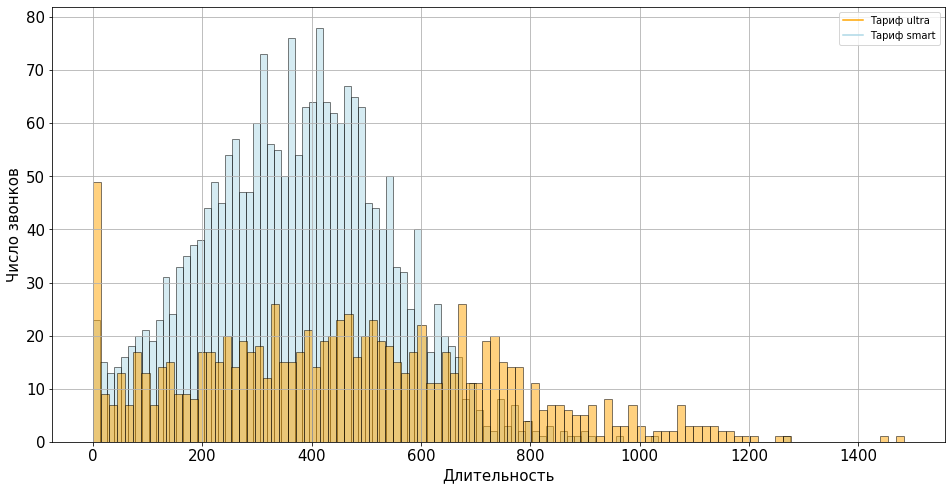

In [177]:
df_all[df_all['tariff'] == 'smart']['duration_month'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='lightblue', ec='black') 

df_all[df_all['tariff'] == 'ultra']['duration_month'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='orange', ec='black') 

plt.plot([], c='orange', label='Тариф ultra')
plt.plot([], c='lightblue', label='Тариф smart')
plt.legend()

plt.suptitle('')
plt.xlabel('Длительность', fontsize=15)
plt.ylabel('Число звонков', fontsize=15)
plt.show()

In [178]:
df_all[df_all['duration_month'] == 0]['duration_month'].count()

48

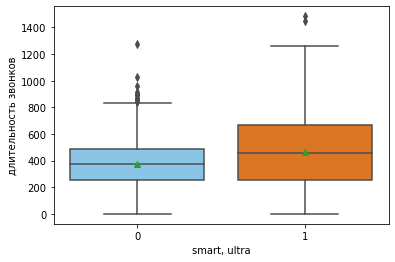

In [179]:
data1 = df_all[df_all['tariff'] == 'smart']['duration_month']
data2 = df_all[df_all['tariff'] == 'ultra']['duration_month']

sns.boxplot(
    data=[data1, data2],
    palette=[sns.xkcd_rgb["lightblue"], sns.xkcd_rgb["orange"]], 
    showmeans=True
)


plt.xlabel("smart, ultra")
plt.ylabel("длительность звонков");

Посмотрим описание длительности звонков тарифа `smart`:

In [180]:
df_all[df_all['tariff'] == 'smart']['duration_month'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
duration_month,2229.0,371.444145,169.885089,0.0,251.0,375.0,485.0,1275.0


Посмотрим описание длительности звонков тарифа `ultra`:

In [181]:
df_all[df_all['tariff'] == 'ultra']['duration_month'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
duration_month,985.0,467.923858,282.660479,0.0,253.0,458.0,670.0,1484.0


In [182]:
x=df_all[df_all['tariff'] == 'ultra']['duration_month']
variance = np.var(x)
variance

79815.83278105591

Посчитаем среднее количество, дисперсию и стандартное отклонение длительности звонков за месяц по тарифам:

In [183]:
duration_month_stat = df_all.pivot_table(index = 'tariff', values = 'duration_month', 
                            aggfunc = ['count','mean', 'var', 'std']).round(0)
duration_month_stat.columns = ['Кол-во звонков в месяц', 'Средняя длительность звонков', 'Дисперсия', 'Стандартное отклонение']

duration_month_stat

,Кол-во звонков в месяц,Средняя длительность звонков,Дисперсия,Стандартное отклонение
tariff,,,,
smart,2229,371.0,28861.0,170.0
ultra,985,468.0,79897.0,283.0


Распределим абонентов тарифа `smart` по группам в зависимости от использования звонков:

In [184]:
def count_duration_month_smart(row):
    if row <= 500:
        return 'В рамках тарифа, звонки до 500 минут'
    
    if row <= 1000:
        return 'Не в рамках тарифа, звонки от 500 до 1000 минут'
    
    if row >= 1000:
        return 'Не в рамках тарифа, звонки более 1000 минут'

    
df_all['count_duration_month_smart'] = df_all[df_all['tariff'] == 'smart']['duration_month'].apply(count_duration_month_smart)
#df_all['count_duration_month_smart'].value_counts().to_frame()


In [185]:
category_calls_smart = df_all.pivot_table(index = 'count_duration_month_smart', values = 'duration_month', 
                            aggfunc = ['count','mean']).round(0)
category_calls_smart.columns = ['Кол-во звонков в месяц', 'Средняя длительность звонков']
category_calls_smart

,Кол-во звонков в месяц,Средняя длительность звонков
count_duration_month_smart,,
"В рамках тарифа, звонки до 500 минут",1744,308.0
"Не в рамках тарифа, звонки более 1000 минут",2,1150.0
"Не в рамках тарифа, звонки от 500 до 1000 минут",483,598.0


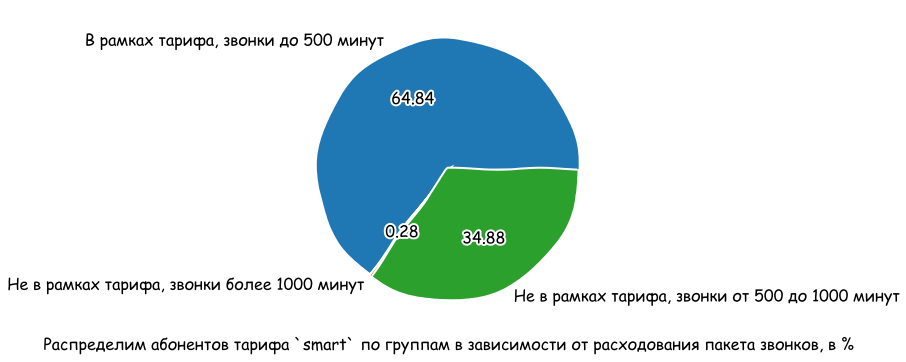

In [186]:
with plt.xkcd():
    df_all.groupby('count_duration_month_smart')['duration_month'].sum().plot.pie(autopct='%.2f', fontsize=16, figsize=(6, 6))
    plt.xlabel("Распределим абонентов тарифа `smart` по группам в зависимости от расходования пакета звонков, в %", size = 16)
    plt.ylabel("")
    plt.show()

Примерно 35% абонентов тарифа `smart` не укладывются в лимит по звонкам.

Распределим абонентов тарифа `ultra` по группам в зависимости от использования звонков:

In [187]:
def count_duration_month_ultra(row):
    if row <= 3000:
        return 'В рамках тарифа, звонки до 3000 минут'
    
    if row > 3000:
        return 'Не в рамках тарифа, звонки более 3000 минут'
   

    
df_all['count_duration_month_ultra'] = df_all[df_all['tariff'] == 'ultra']['duration_month'].apply(count_duration_month_ultra)
#df_all['count_duration_month_smart'].value_counts().to_frame()


In [188]:
category_calls_ultra = df_all.pivot_table(index = 'count_duration_month_ultra', values = 'duration_month', 
                            aggfunc = ['count','mean']).round(0)
category_calls_ultra.columns = ['Кол-во звонков в месяц', 'Средняя длительность звонков']
category_calls_ultra

,Кол-во звонков в месяц,Средняя длительность звонков
count_duration_month_ultra,,
"В рамках тарифа, звонки до 3000 минут",985,468.0


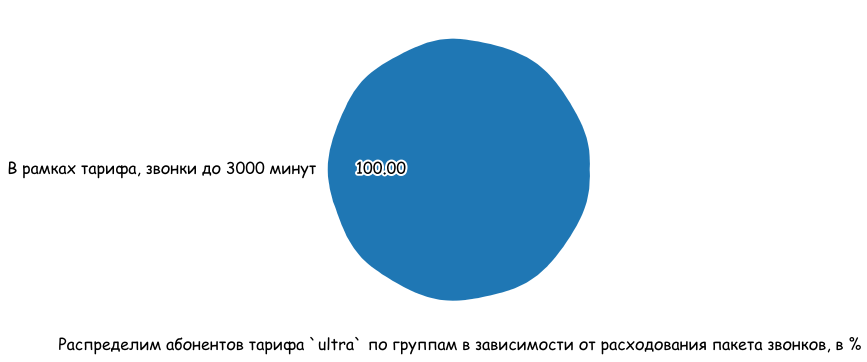

In [189]:
with plt.xkcd():
    df_all.groupby('count_duration_month_ultra')['duration_month'].sum().plot.pie(autopct='%.2f', fontsize=16, figsize=(6, 6))
    plt.xlabel("Распределим абонентов тарифа `ultra` по группам в зависимости от расходования пакета звонков, в %", size = 16)
    plt.ylabel("")
    plt.show()

Абоненты тарифа `ultra` не превышают лимит по звонкам.

### Проанализируем сообщения по тарифам.

Построим гистограмму распределения количества сообщений:

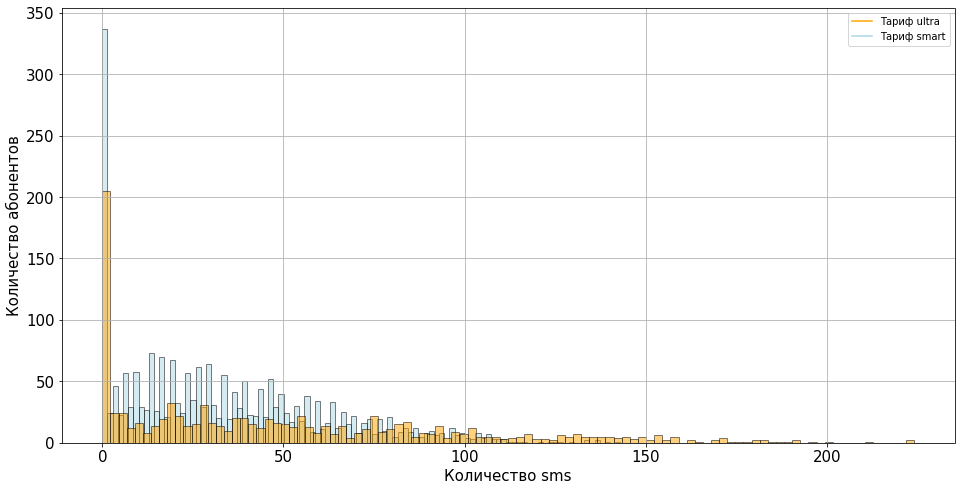

In [190]:
df_all[df_all['tariff'] == 'smart']['count_sms'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='lightblue', ec='black') 

df_all[df_all['tariff'] == 'ultra']['count_sms'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='orange', ec='black') 

plt.plot([], c='orange', label='Тариф ultra')
plt.plot([], c='lightblue', label='Тариф smart')
plt.legend()

plt.suptitle('')
plt.xlabel('Количество sms', fontsize=15)
plt.ylabel('Количество абонентов', fontsize=15)
plt.show()

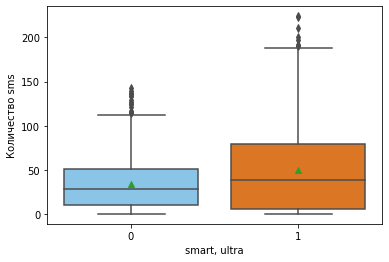

In [191]:
data1 = df_all[df_all['tariff'] == 'smart']['count_sms']
data2 = df_all[df_all['tariff'] == 'ultra']['count_sms']

sns.boxplot(
    data=[data1, data2],
    palette=[sns.xkcd_rgb["lightblue"], sns.xkcd_rgb["orange"]], 
    showmeans=True
)


plt.xlabel("smart, ultra")
plt.ylabel("Количество sms");

Посмотрим описание количества сообщений:

In [192]:
df_all[df_all['tariff'] == 'smart']['count_sms'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
count_sms,2229.0,33.384029,28.227876,0.0,10.0,28.0,51.0,143.0


In [193]:
df_all[df_all['tariff'] == 'ultra']['count_sms'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
count_sms,985.0,49.363452,47.804457,0.0,6.0,38.0,79.0,224.0


Посчитаем среднее количество, дисперсию и стандартное отклонение количества сообщений за месяц по тарифам:

In [194]:
count_sms_stat = df_all.pivot_table(index = 'tariff', values = 'count_sms', 
                            aggfunc = ['count','mean', 'var', 'std']).round(0)
count_sms_stat.columns = ['Кол-во смс в месяц', 'Среднее кол-во', 'Дисперсия', 'Стандартное отклонение']

count_sms_stat

,Кол-во смс в месяц,Среднее кол-во,Дисперсия,Стандартное отклонение
tariff,,,,
smart,2229,33.0,797.0,28.0
ultra,985,49.0,2285.0,48.0


Распределим абонентов тарифа `smart` по группам в зависимости от использования sms:

In [195]:
def count_sms_month_smart(row):
    if row <= 50:
        return 'В рамках тарифа, sms до 50'
    
    if row <= 100:
        return 'Не в рамках тарифа, sms от 50 до 100'
    
    if row > 100:
        return 'Не в рамках тарифа, sms более 100'

    
df_all['count_sms_month_smart'] = df_all[df_all['tariff'] == 'smart']['count_sms'].apply(count_sms_month_smart)


In [196]:
category_sms_smart = df_all.pivot_table(index = 'count_sms_month_smart', values = 'count_sms', 
                            aggfunc = ['count','mean']).round(0)
category_sms_smart.columns = ['Кол-во sms в месяц', 'Среднее количество sms']
category_sms_smart

,Кол-во sms в месяц,Среднее количество sms
count_sms_month_smart,,
"В рамках тарифа, sms до 50",1665,20.0
"Не в рамках тарифа, sms более 100",50,112.0
"Не в рамках тарифа, sms от 50 до 100",514,69.0


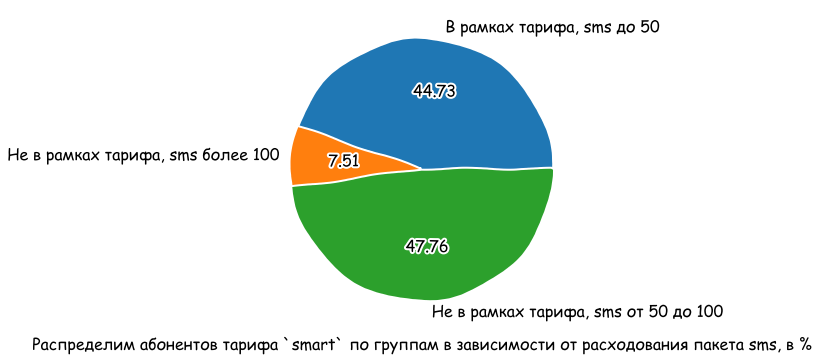

In [197]:
with plt.xkcd():
    df_all.groupby('count_sms_month_smart')['count_sms'].sum().plot.pie(autopct='%.2f', fontsize=16, figsize=(6, 6))
    plt.xlabel("Распределим абонентов тарифа `smart` по группам в зависимости от расходования пакета sms, в %", size = 16)
    plt.ylabel("")
    plt.show()

Примерно 55% абонентов тарифа `smart` превышают лимит по sms.

Распределим абонентов тарифа `ultra` по группам в зависимости от использования sms:

In [198]:
def count_sms_month_ultra(row):
    if row <= 1000:
        return 'В рамках тарифа, sms до 1000'

    if row > 1000:
        return 'Не в рамках тарифа, sms более 1000'

    
df_all['count_sms_month_ultra'] = df_all[df_all['tariff'] == 'ultra']['count_sms'].apply(count_sms_month_ultra)

In [199]:
category_sms_ultra = df_all.pivot_table(index = 'count_sms_month_ultra', values = 'count_sms', 
                            aggfunc = ['count','mean']).round(0)
category_sms_ultra.columns = ['Кол-во sms в месяц', 'Среднее количество sms']
category_sms_ultra

,Кол-во sms в месяц,Среднее количество sms
count_sms_month_ultra,,
"В рамках тарифа, sms до 1000",985,49.0


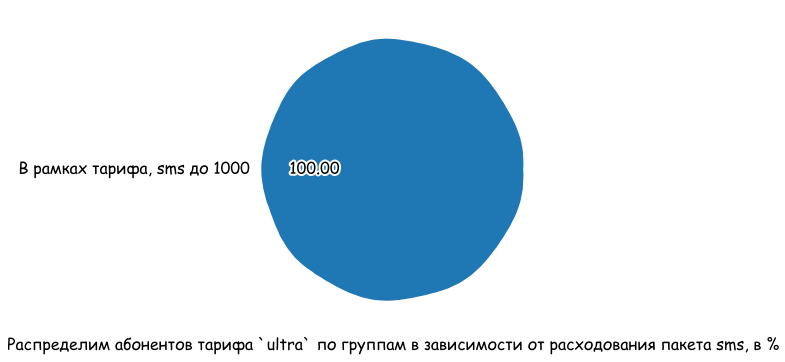

In [200]:
with plt.xkcd():
    df_all.groupby('count_sms_month_ultra')['count_sms'].sum().plot.pie(autopct='%.2f', fontsize=16, figsize=(6, 6))
    plt.xlabel("Распределим абонентов тарифа `ultra` по группам в зависимости от расходования пакета sms, в %", size = 16)
    plt.ylabel("")
    plt.show()

Абоненты тарифа `ultra` не превышают лимит тарифа по sms.

### Проанализируем трафик по тарифам.

Построим графики распределения интернет трафика:

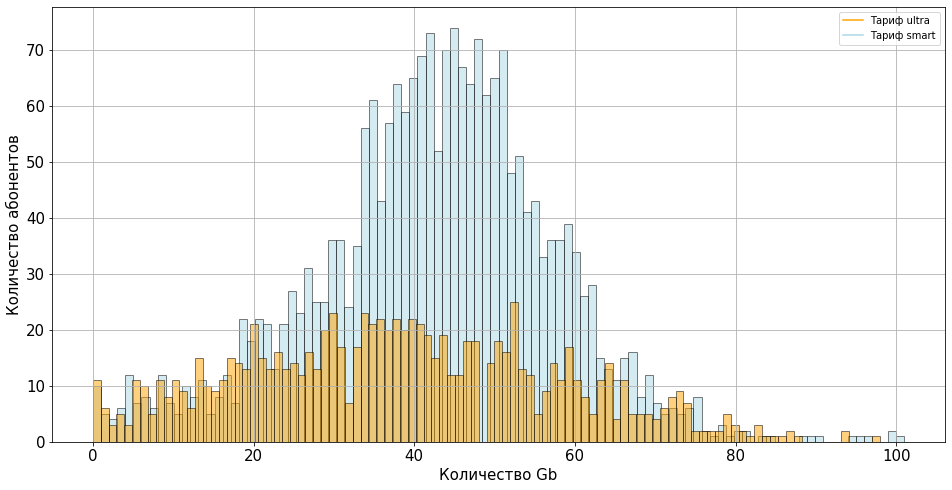

In [201]:
df_all[df_all['tariff'] == 'smart']['gb_used'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='lightblue', ec='black')

df_all[df_all['tariff'] == 'ultra']['gb_used'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='orange', ec='black')

plt.plot([], c='orange', label='Тариф ultra')
plt.plot([], c='lightblue', label='Тариф smart')
plt.legend()

plt.suptitle('')
plt.xlabel('Количество Gb', fontsize=15)
plt.ylabel('Количество абонентов', fontsize=15)
plt.show()

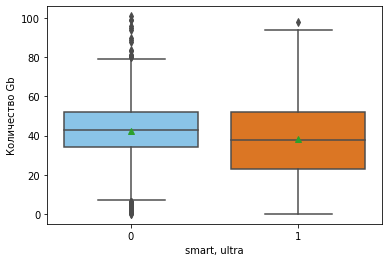

In [202]:
data1 = df_all[df_all['tariff'] == 'smart']['gb_used']
data2 = df_all[df_all['tariff'] == 'ultra']['gb_used']

sns.boxplot(
    data=[data1, data2],
    palette=[sns.xkcd_rgb["lightblue"], sns.xkcd_rgb["orange"]], 
    showmeans=True
)


plt.xlabel("smart, ultra")
plt.ylabel("Количество Gb");

Посмотрим описание использованного трафика:

In [203]:
df_all[df_all['tariff'] == 'smart']['gb_used'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
gb_used,2229.0,42.377748,14.935167,0.0,34.0,43.0,52.0,101.0


In [204]:
df_all[df_all['tariff'] == 'ultra']['gb_used'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
gb_used,985.0,38.140102,19.55144,0.0,23.0,38.0,52.0,98.0


Посчитаем среднее количество, дисперсию и стандартное отклонение трафика за месяц по тарифам:

In [205]:
gb_used_stat = df_all.pivot_table(index = 'tariff', values = 'gb_used', 
                            aggfunc = ['count','mean', 'var', 'std']).round(0)
gb_used_stat.columns = ['Кол-во Гб в месяц', 'Среднее кол-во', 'Дисперсия', 'Стандартное отклонение']

gb_used_stat

,Кол-во Гб в месяц,Среднее кол-во,Дисперсия,Стандартное отклонение
tariff,,,,
smart,2229,42.0,223.0,15.0
ultra,985,38.0,382.0,20.0


Распределим абонентов тарифа `smart` по группам в зависимости от использования интернет-трафика:

In [206]:
def count_gb_month_smart(row):
    if row <= 15:
        return 'В рамках тарифа, трафик до 15 Гб'
    
    if row <= 30:
        return 'Не в рамках тарифа, трафик от 15 до 30 Гб'
    
    if row <= 45:
        return 'Не в рамках тарифа, трафик от 30 до 45 Гб'
    
    if row <= 60:
        return 'Не в рамках тарифа, трафик от 45 до 60 Гб'
    
    if row <= 85:
        return 'Не в рамках тарифа, трафик от 60 до 85 Гб'
    
    if row > 85:
        return 'Не в рамках тарифа, трафик более 85 Гб'

df_all['count_gb_month_smart'] = df_all[df_all['tariff'] == 'smart']['gb_used'].apply(count_gb_month_smart)

In [207]:
category_gb_smart = df_all.pivot_table(index = 'count_gb_month_smart', values = 'gb_used', 
                            aggfunc = ['count','mean']).round(0)
category_gb_smart.columns = ['Кол-во Гб в месяц', 'Среднее количество Гб']
category_gb_smart

,Кол-во Гб в месяц,Среднее количество Гб
count_gb_month_smart,,
"В рамках тарифа, трафик до 15 Гб",116,8.0
"Не в рамках тарифа, трафик более 85 Гб",9,95.0
"Не в рамках тарифа, трафик от 15 до 30 Гб",311,24.0
"Не в рамках тарифа, трафик от 30 до 45 Гб",838,39.0
"Не в рамках тарифа, трафик от 45 до 60 Гб",761,52.0
"Не в рамках тарифа, трафик от 60 до 85 Гб",194,67.0


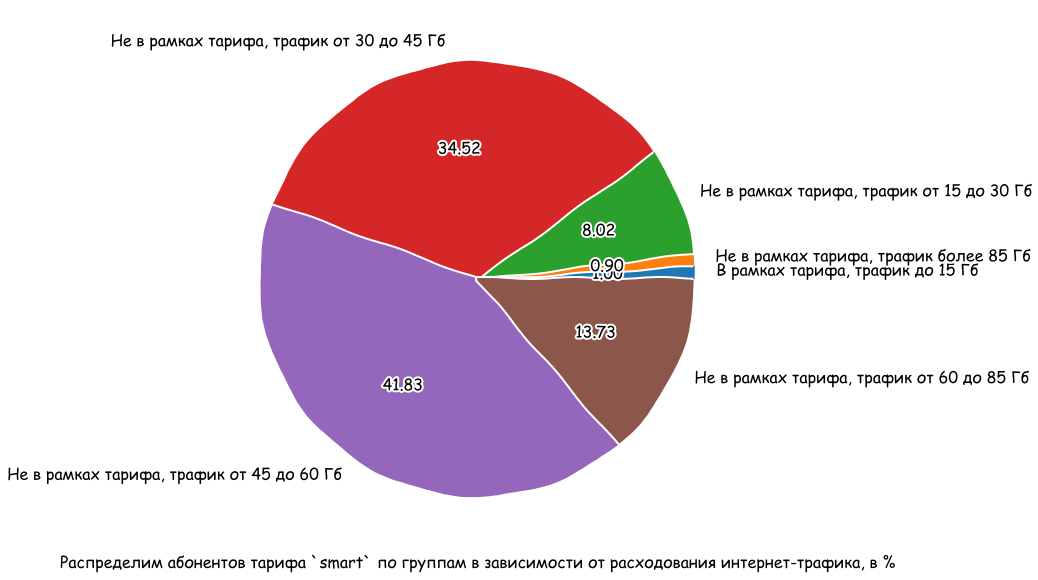

In [208]:
with plt.xkcd():
    df_all.groupby('count_gb_month_smart')['gb_used'].sum().plot.pie(autopct='%.2f', fontsize=16, figsize=(10, 10))
    plt.xlabel("Распределим абонентов тарифа `smart` по группам в зависимости от расходования интернет-трафика, в %", size = 16)
    plt.ylabel("")
    plt.show()

Почти все абоненты тарифа `smart` превышают лимит по интернет-трафику.

Распределим абонентов тарифа `ultra` по группам в зависимости от использования интернет-трафика:

In [209]:
def count_gb_month_ultra(row):
    if row <= 30:
        return 'В рамках тарифа, трафик до 30 Гб'
    
    if row <= 60:
        return 'Не в рамках тарифа, трафик от 30 до 60 Гб'
    
    if row <= 90:
        return 'Не в рамках тарифа, трафик от 60 до 90 Гб'
    
    if row > 90:
        return 'Не в рамках тарифа, трафик более 90 Гб'

df_all['count_gb_month_ultra'] = df_all[df_all['tariff'] == 'ultra']['gb_used'].apply(count_gb_month_ultra)

In [210]:
category_gb_ultra = df_all.pivot_table(index = 'count_gb_month_ultra', values = 'gb_used', 
                            aggfunc = ['count','mean']).round(0)
category_gb_ultra.columns = ['Кол-во Гб в месяц', 'Среднее количество Гб']
category_gb_ultra

,Кол-во Гб в месяц,Среднее количество Гб
count_gb_month_ultra,,
"В рамках тарифа, трафик до 30 Гб",362,18.0
"Не в рамках тарифа, трафик более 90 Гб",3,95.0
"Не в рамках тарифа, трафик от 30 до 60 Гб",490,44.0
"Не в рамках тарифа, трафик от 60 до 90 Гб",130,70.0


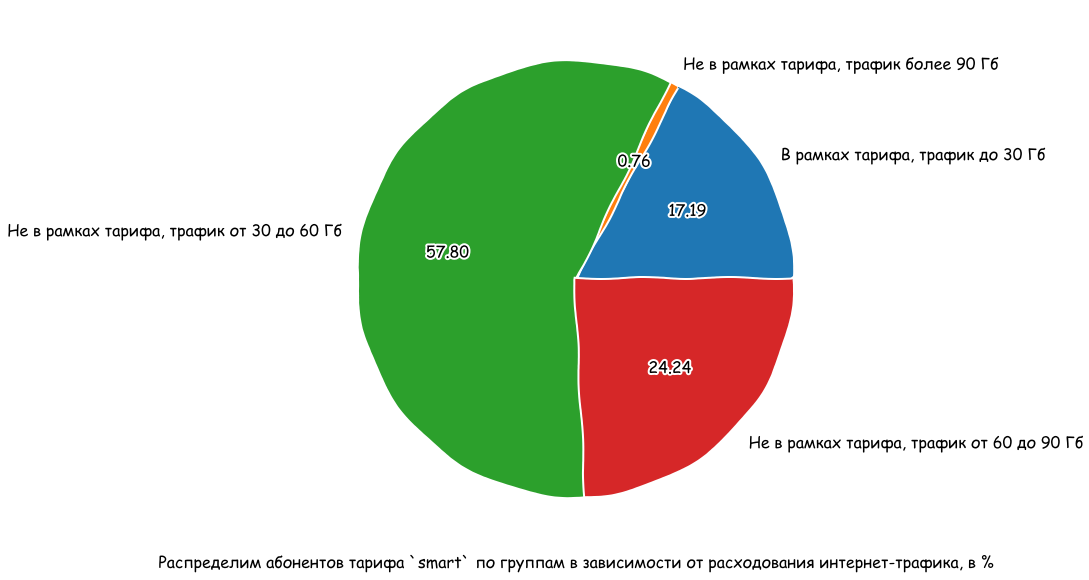

In [211]:
with plt.xkcd():
    df_all.groupby('count_gb_month_ultra')['gb_used'].sum().plot.pie(autopct='%.2f', fontsize=16, figsize=(10, 10))
    plt.xlabel("Распределим абонентов тарифа `smart` по группам в зависимости от расходования интернет-трафика, в %", size = 16)

    plt.ylabel("")
    plt.show()

Почти 83% абонентов тарифа `ultra` превышают лимит по интернет-трафику.

### Общий анализ.

Построим график переплат:

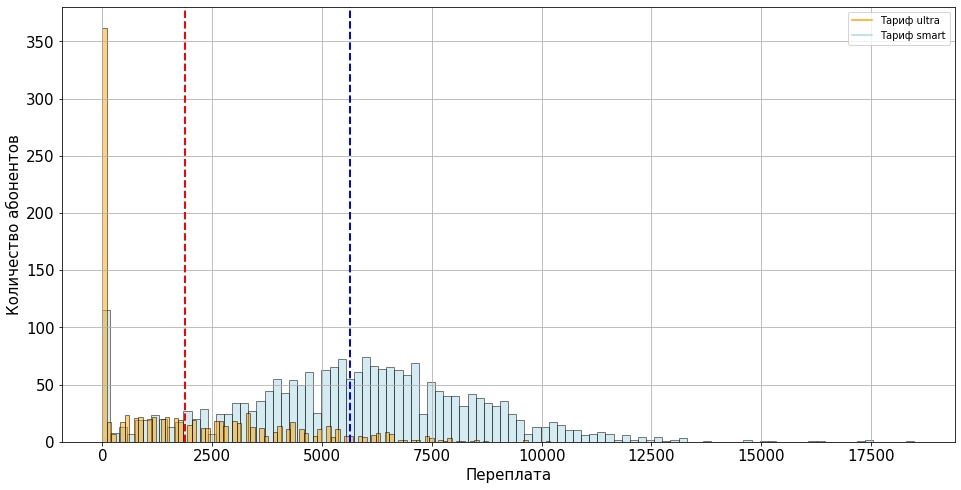

In [212]:
#график переплат по тарифам 
x = df_all[df_all['tariff'] == 'smart']['above_tariff']
y = df_all[df_all['tariff'] == 'ultra']['above_tariff']

plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(y.mean(), color='r', linestyle='dashed', linewidth=2)

#plt.text(x.mean(), max_ylim, 'Среднее smart: {:.0f}'.format(x.mean()), fontsize=12).set_rotation(15)
#plt.text(y.mean(), max_ylim, 'Среднее ultra: {:.0f}'.format(y.mean()), fontsize=12).set_rotation(15)

plt.plot([], c='orange', label='Тариф ultra')
plt.plot([], c='lightblue', label='Тариф smart')
plt.legend()


x.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5, ylabelsize=15, facecolor='lightblue', ec='black') 

y.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5, ylabelsize=15, facecolor='orange', ec='black') 



plt.suptitle('')
plt.xlabel('Переплата', fontsize=15)
plt.ylabel('Количество абонентов', fontsize=15)
plt.show()

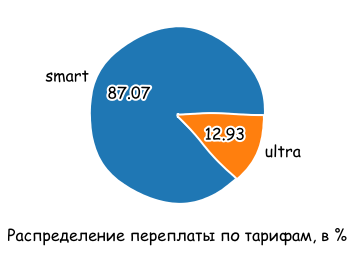

In [213]:
#
with plt.xkcd():
    df_all.groupby('tariff')['above_tariff'].sum().plot.pie(autopct='%.2f', fontsize=16, figsize=(4, 4))
    plt.xlabel("Распределение переплаты по тарифам, в %", size = 16)

    plt.ylabel("")
    plt.show()

Определим прибыль по каждому тарифу:

In [214]:
tariff_profit = df_all.pivot_table(index = 'tariff', values = 'profit_month', aggfunc='sum')
tariff_profit.columns = ['Прибыль за месяц по каждому тарифу, руб.']
tariff_profit

,"Прибыль за месяц по каждому тарифу, руб."
tariff,
smart,13774235
ultra,3783600


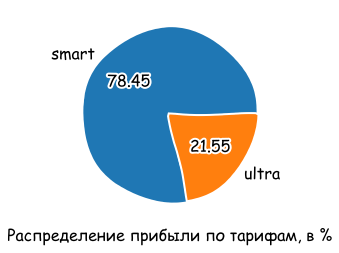

In [215]:
#
with plt.xkcd():
    df_all.groupby('tariff')['profit_month'].sum().plot.pie(autopct='%.2f', fontsize=16, figsize=(4, 4))
    plt.xlabel("Распределение прибыли по тарифам, в %", size = 16)

    plt.ylabel("")
    plt.show()

Посмотрим на использование опций тарифа по месяцам, для тарифа `smart`

In [216]:
columns = ['count_calls', 'count_sms', 'duration_month', 'gb_used']

In [217]:
stat_smart_month = pd.pivot_table(data=df_month.loc[df_month['tariff']=='smart'],
                               values=columns, index = 'month')#, aggfunc=sum
stat_smart_month

,count_calls,count_sms,duration_month,gb_used
month,,,,
1,27.676471,18.235294,182.294118,21.558824
2,40.189655,24.086207,266.431034,29.758621
3,54.324675,31.857143,346.636364,39.792208
4,51.312500,30.741071,326.053571,35.482143
5,55.241135,33.773050,343.574468,41.177305
6,55.548780,33.402439,351.628049,41.109756
7,56.726368,33.751244,362.985075,41.482587
8,58.978723,33.638298,374.685106,43.357447
9,59.546154,33.638462,381.003846,42.680769


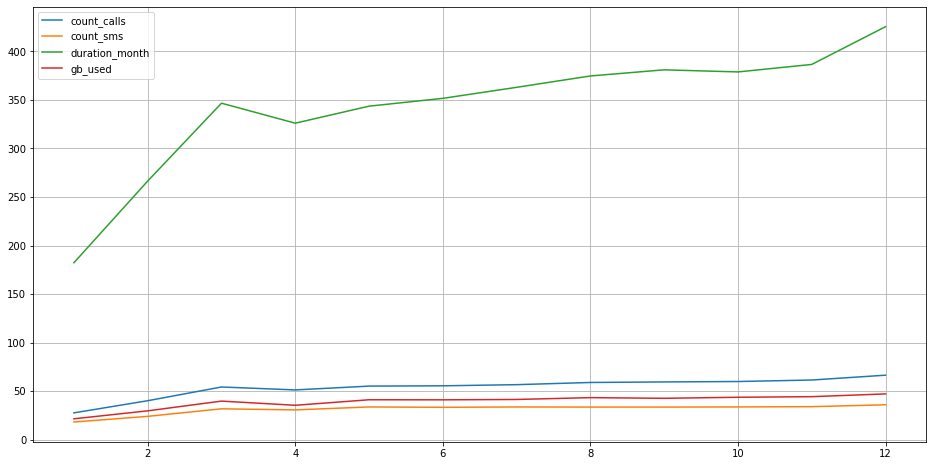

In [218]:
stat_smart_month.plot.line(figsize= (16,8), grid=True) 

plt.plot([], )
plt.plot([], )
plt.legend()

plt.suptitle('')
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.show()

Посмотрим на использование опций тарифа по месяцам, для тарифа `ultra`:

In [219]:
columns = ['count_calls', 'count_sms', 'duration_month', 'gb_used']

stat_ultra_month = pd.pivot_table(data=df_month.loc[df_month['tariff']=='ultra'],
                             values=columns, index = 'month')#, aggfunc=sum
stat_ultra_month

,count_calls,count_sms,duration_month,gb_used
month,,,,
1,59.444444,33.777778,382.111111,27.222222
2,41.541667,21.958333,263.333333,23.875000
3,67.675676,32.297297,435.918919,34.216216
4,64.090909,31.563636,406.490909,33.145455
5,72.507463,37.850746,453.014925,38.134328
6,66.738095,41.726190,426.178571,37.035714
7,75.780220,49.846154,485.087912,40.274725
8,71.289720,48.439252,453.878505,38.084112
9,74.600000,52.286957,479.530435,37.669565


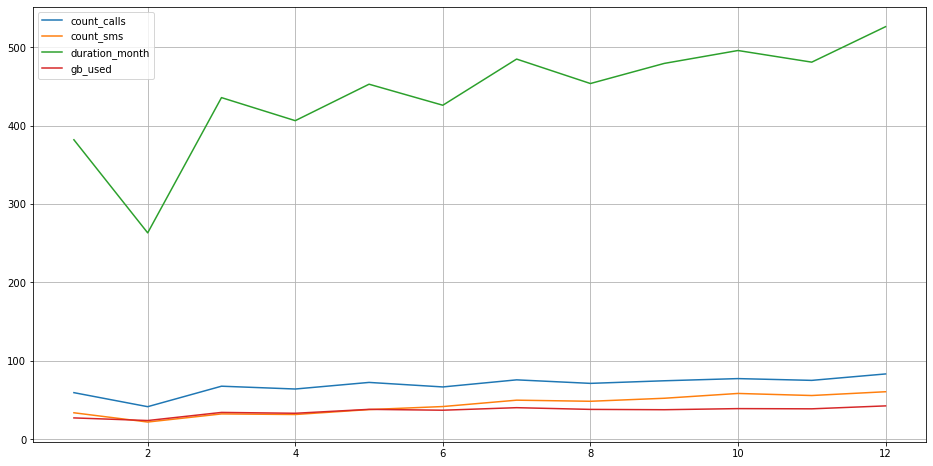

In [220]:
stat_ultra_month.plot.line(figsize= (16,8), grid=True) 


plt.plot([], )
plt.plot([], )
plt.legend()


plt.suptitle('')
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.show()

### Вывод:

- *Средняя длительность звонков за месяц тарифа:*\
`smart` 371\
`ultra` 468
- *Дисперсия:*\
`smart` 28861\
`ultra` 79897
- *Стандартное отклонение:*\
`smart` 170\
`ultra` 283


- *Среднее количество смс за месяц тарифа:*\
`smart` 33\
`ultra` 49
- *Дисперсия:*\
`smart` 797\
`ultra` 2285
- *Стандартное отклонение:*\
`smart` 28\
`ultra` 48


- *Среднее количество Гб в месяц тарифа:*\
`smart` 42\
`ultra` 38
- *Дисперсия:*\
`smart` 223\
`ultra` 382
- *Стандартное отклонение:*\
`smart` 15\
`ultra` 20


Примерно 35% абонентов тарифа `smart` не укладывются в лимит по звонкам.\
Примерно 55% абонентов тарифа `smart` превышают лимит по sms.\
Почти все абоненты тарифа `smart` превышают лимит по интернет-трафику.


Абоненты тарифа `ultra` не превышают лимит по звонкам.\
Абоненты тарифа `ultra` не превышают лимит тарифа по sms.\
Почти 83% абонентов тарифа `ultra` превышают лимит по интернет-трафику.

Большую долю прибыли принелси абоненты тарифа `smart`

В течении года быстрее всего росла длительность звонков по всем тарифам


## Проверка гипотез

### Cредняя выручка абонентов тарифов «Ультра» и «Смарт» различаются

Отобразим графически распределение выручки по тарифам:

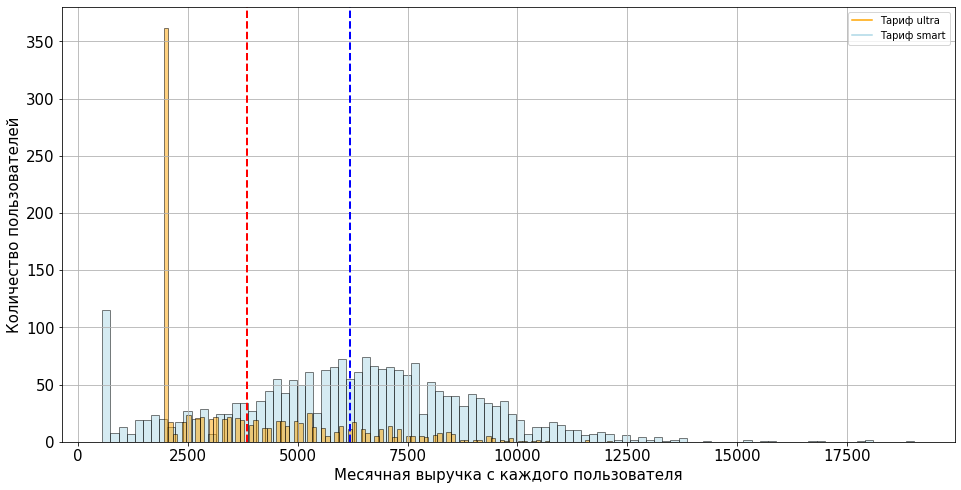

In [221]:
x = df_all[df_all['tariff'] == 'smart']['profit_month']
y = df_all[df_all['tariff'] == 'ultra']['profit_month']

plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(y.mean(), color='r', linestyle='dashed', linewidth=2)

#plt.text(x.mean(), max_ylim, 'Среднее smart: {:.0f}'.format(x.mean()), fontsize=12).set_rotation(15)
#plt.text(y.mean(), max_ylim, 'Среднее ultra: {:.0f}'.format(y.mean()), fontsize=12).set_rotation(15)

plt.plot([], c='orange', label='Тариф ultra')
plt.plot([], c='lightblue', label='Тариф smart')
plt.legend()


x.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5, ylabelsize=15, facecolor='lightblue', ec='black') 

y.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5, ylabelsize=15, facecolor='orange', ec='black') 



plt.suptitle('')
plt.xlabel('Месячная выручка с каждого пользователя', fontsize=15)
plt.ylabel('Количество пользователей', fontsize=15)
plt.show()

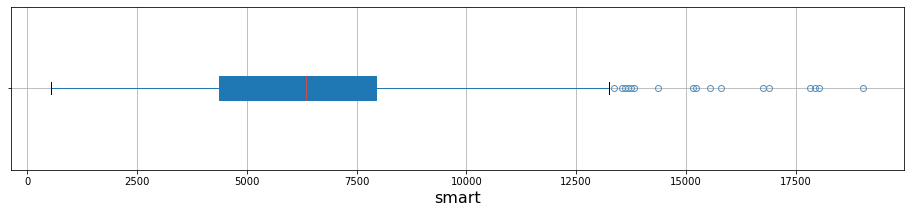

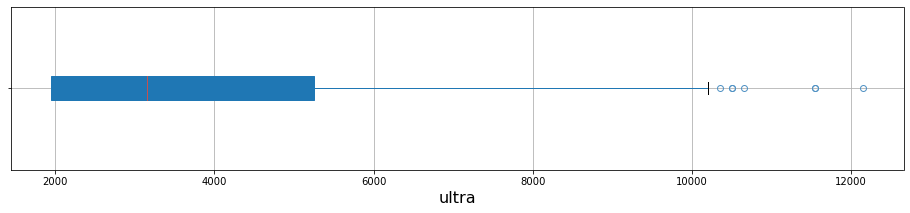

In [222]:
ax=df_all[df_all['tariff'] == 'smart'].boxplot('profit_month', vert=False, figsize=(16,3), patch_artist=True,
              flierprops=dict(markeredgecolor="#5192c4"),
                medianprops=dict(color='#c45151'))
ax.set_yticklabels([''])
plt.xlabel('smart', fontsize=16)
plt.show()

ax=df_all[df_all['tariff'] == 'ultra'].boxplot('profit_month', vert=False, figsize=(16,3), patch_artist=True,
              flierprops=dict(markeredgecolor="#5192c4"),
                medianprops=dict(color='#c45151'))
ax.set_yticklabels([''])
plt.xlabel('ultra', fontsize=16)
plt.show()

Отобразим описание средней выручки тарифа `smart`:

In [223]:
df_all[df_all['tariff'] == 'smart']['profit_month'].describe()

count     2229.000000
mean      6179.558098
std       2868.871589
min        550.000000
25%       4374.000000
50%       6350.000000
75%       7950.000000
max      19025.000000
Name: profit_month, dtype: float64

Отобразим описание средней выручки тарифа `ultra`:

In [224]:
df_all[df_all['tariff'] == 'ultra']['profit_month'].describe()

count      985.000000
mean      3841.218274
std       2163.884206
min       1950.000000
25%       1950.000000
50%       3150.000000
75%       5250.000000
max      12150.000000
Name: profit_month, dtype: float64

Определим среднюю выручку по тарифам:

In [225]:
profit_month_stat = df_all.pivot_table(index = 'tariff', values = 'profit_month', aggfunc = ['mean']).round(0)
profit_month_stat.columns = ['Средняя выручка ']

profit_month_stat

,Средняя выручка
tariff,
smart,6180.0
ultra,3841.0


In [226]:
profit_smart = df_all[df_all['tariff'] == 'smart']['profit_month']

In [227]:
profit_ultra = df_all[df_all['tariff'] == 'ultra']['profit_month']

Прверим гипотезу:
* H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» `не различаются`
* H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» `различаются`

Установим критический уровень значимости `alpha` равный 5%, т.е. ошибка не должна превышать 5%, а верный результат не должен быть менее 95%

In [228]:
alpha = 0.05

results = st.ttest_ind(
    profit_smart,
    profit_ultra
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 2.39328485334631e-107
Отвергаем нулевую гипотезу


Вывод: Проверка гипотезы подтвердила, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Отобразим графически распределение выручки по Москве и регионам:

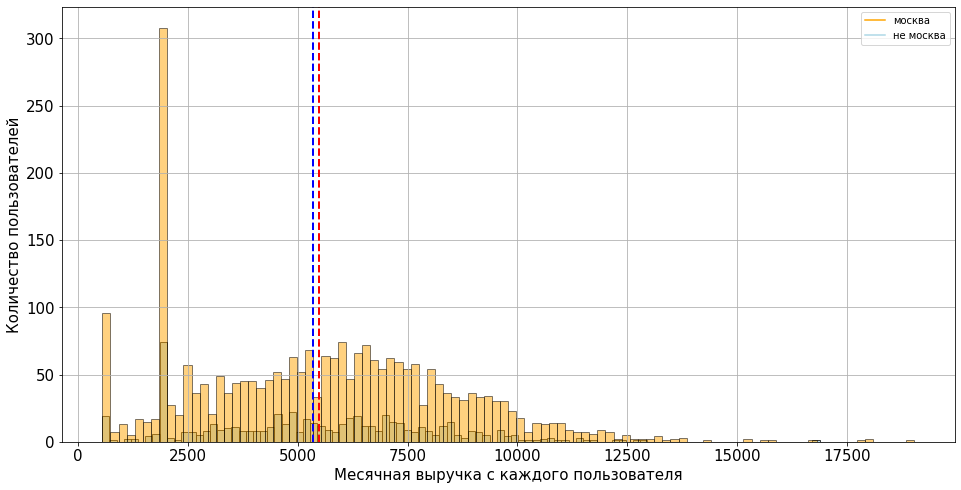

In [229]:
#приведем к нижнему регистру колонку city
df_all['city'] = df_all['city'].str.lower()


x = df_all.query('city == "москва"')['profit_month']
y = df_all.query('city != "москва"')['profit_month']

plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(y.mean(), color='r', linestyle='dashed', linewidth=2)

#plt.text(x.mean(), max_ylim, 'москва: {:.1f}'.format(x.mean()), fontsize=12).set_rotation(15)
#plt.text(y.mean(), max_ylim, 'не москва: {:.1f}'.format(y.mean()), fontsize=12).set_rotation(0)

plt.plot([], c='orange', label='москва')
plt.plot([], c='lightblue', label='не москва')
plt.legend()


x.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.75, ylabelsize=15, facecolor='lightblue', ec='black') 

y.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5, ylabelsize=15, facecolor='orange', ec='black') 



plt.suptitle('')
plt.xlabel('Месячная выручка с каждого пользователя', fontsize=15)
plt.ylabel('Количество пользователей', fontsize=15)
plt.show()

Рассчитаем выручку по абонентам из Москвы:

In [230]:
#msk_user = df_all[df_all['city']=='москва']['profit_month']
msk_user = df_all.query('city == "москва"')['profit_month']

Рассчитаем выручку по абонентам не из Москвы:

In [231]:
#no_msk_user =  df_all[df_all['city']!='москва']['profit_month']
no_msk_user = df_all.query('city != "москва"')['profit_month']

Прверим гипотезу:
* H0: средняя выручка пользователей из Москвы `не отличается` от выручки пользователей из других регионов
* H1: средняя выручка пользователей из Москвы `отличается` от выручки пользователей из других регионов


Установим критический уровень значимости `alpha` равный 5%, т.е. ошибка не должна превышать 5%, а верный результат не должен быть менее 95%

In [232]:
alpha = 0.05

results  = st.ttest_ind(
    msk_user, 
    no_msk_user
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2848666400674445
Не получилось отвергнуть нулевую гипотезу


Вывод: Проверка гипотез подтвердила, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

## Общий вывод

Распределение основных величин тарифов схожее, что говорит о примерно одинаковом поведении абонентов.\
Прибыльность тарифов различается.\
Потребление пакетов услуг по тарифам, абонентов из регионов, схоже с потреблением абонентов из Москвы.\
Абоненты тарифа smart активнее используют интернет-трафик.\
Абоненты тарифа ultra активнее используют звонки и смс.

Абоненты тарифа smart часто превышают лимиты своего тарифа, значит этот тариф не соответствует потреблению абонентов.\
Для удержания абонентов, компания должна предложить оптимальный тариф соответствующий потреблению абонентов и собственной выручке.




    
    
